In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
random_state = 0
np.random.seed(random_state)


In [2]:
with open('segments/mostcommon300list_distractor_corpus_no_harris.txt', 'r') as f:
    commonlist = f.read().split('\n')
commonlist

['a',
 'about',
 'across',
 'after',
 'again',
 'against',
 '#air',
 'all',
 'almost',
 'along',
 'always',
 'an',
 'and',
 'another',
 'any',
 'anything',
 'are',
 'around',
 'as',
 '#asked',
 'at',
 'away',
 'back',
 '#bad',
 'be',
 'because',
 '#bed',
 'been',
 'before',
 '#began',
 'behind',
 'being',
 '#better',
 'between',
 '#big',
 '#billy',
 '#black',
 '#blaze',
 '#blood',
 '#body',
 'both',
 '#boy',
 'but',
 'by',
 'ca',
 '#called',
 '#came',
 'can',
 '#car',
 '#come',
 '#coming',
 'could',
 '#course',
 'd',
 '#danny',
 '#dark',
 '#day',
 '#dead',
 'did',
 'do',
 'does',
 '#door',
 'down',
 'each',
 '#end',
 'enough',
 'even',
 'ever',
 'every',
 '#eyes',
 '#face',
 '#far',
 '#father',
 '#feel',
 '#feet',
 '#felt',
 'few',
 '#find',
 '#first',
 '#five',
 '#floor',
 'for',
 '#found',
 '#four',
 'from',
 'front',
 '#garraty',
 '#get',
 '#girl',
 '#go',
 '#god',
 '#going',
 '#gone',
 '#good',
 '#got',
 '#great',
 'had',
 '#hair',
 '#half',
 '#hand',
 '#hands',
 '#happened',
 '#ha

In [3]:
function_words = [item for item in commonlist if not item.startswith('#') and item]
print(len(function_words))
function_words

134


['a',
 'about',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'along',
 'always',
 'an',
 'and',
 'another',
 'any',
 'anything',
 'are',
 'around',
 'as',
 'at',
 'away',
 'back',
 'be',
 'because',
 'been',
 'before',
 'behind',
 'being',
 'between',
 'both',
 'but',
 'by',
 'ca',
 'can',
 'could',
 'd',
 'did',
 'do',
 'does',
 'down',
 'each',
 'enough',
 'even',
 'ever',
 'every',
 'few',
 'for',
 'from',
 'front',
 'had',
 'has',
 'have',
 'here',
 'high',
 'how',
 'if',
 'in',
 'inside',
 'into',
 'is',
 'it',
 'its',
 'just',
 'let',
 'like',
 'll',
 'm',
 'maybe',
 'might',
 'more',
 'most',
 'much',
 'must',
 'never',
 'no',
 'nothing',
 'now',
 'nt',
 'of',
 'off',
 'oh',
 'on',
 'once',
 'one',
 'only',
 'or',
 'other',
 'our',
 'out',
 'over',
 'own',
 're',
 'really',
 's',
 'same',
 'seemed',
 'should',
 'so',
 'some',
 'someone',
 'something',
 'still',
 'sure',
 'than',
 'that',
 'the',
 'then',
 'there',
 'these',
 'this',
 'those',
 'through',
 'to',

In [4]:
", ".join([word for word in function_words])

'a, about, across, after, again, against, all, almost, along, always, an, and, another, any, anything, are, around, as, at, away, back, be, because, been, before, behind, being, between, both, but, by, ca, can, could, d, did, do, does, down, each, enough, even, ever, every, few, for, from, front, had, has, have, here, high, how, if, in, inside, into, is, it, its, just, let, like, ll, m, maybe, might, more, most, much, must, never, no, nothing, now, nt, of, off, oh, on, once, one, only, or, other, our, out, over, own, re, really, s, same, seemed, should, so, some, someone, something, still, sure, than, that, the, then, there, these, this, those, through, to, too, toward, under, until, up, ve, very, was, well, were, what, when, where, which, while, who, why, will, with, without, would, yes'

In [5]:
content_words = [item for item in commonlist if item.startswith('#') and item]
print(content_words)

['#air', '#asked', '#bad', '#bed', '#began', '#better', '#big', '#billy', '#black', '#blaze', '#blood', '#body', '#boy', '#called', '#came', '#car', '#come', '#coming', '#course', '#danny', '#dark', '#day', '#dead', '#door', '#end', '#eyes', '#face', '#far', '#father', '#feel', '#feet', '#felt', '#find', '#first', '#five', '#floor', '#found', '#four', '#garraty', '#get', '#girl', '#go', '#god', '#going', '#gone', '#good', '#got', '#great', '#hair', '#half', '#hand', '#hands', '#happened', '#hard', '#harold', '#he-', '#head', '#hear', '#heard', '#her-', '#herself-', '#him-', '#himself-', '#his-', '#home', '#house', '#i-', '#jack', '#julia', '#knew', '#know', '#larry', '#last', '#later', '#left', '#life', '#light', '#little', '#long', '#look', '#looked', '#looking', '#lot', '#made', '#make', '#man', '#me-', '#men', '#mind', '#moment', '#mother', '#mouth', '#mr', '#my-', '#name', '#new', '#next', '#night', '#nora', '#not', '#old', '#open', '#opened', '#past', '#people', '#place', '#pulled

In [6]:
", ".join([word.strip("#-") for word in content_words])

'air, asked, bad, bed, began, better, big, billy, black, blaze, blood, body, boy, called, came, car, come, coming, course, danny, dark, day, dead, door, end, eyes, face, far, father, feel, feet, felt, find, first, five, floor, found, four, garraty, get, girl, go, god, going, gone, good, got, great, hair, half, hand, hands, happened, hard, harold, he, head, hear, heard, her, herself, him, himself, his, home, house, i, jack, julia, knew, know, larry, last, later, left, life, light, little, long, look, looked, looking, lot, made, make, man, me, men, mind, moment, mother, mouth, mr, my, name, new, next, night, nora, not, old, open, opened, past, people, place, pulled, put, red, richard, right, road, room, said, sat, saw, say, second, see, seen, she, side, small, sound, stood, stop, street, stu, suddenly, take, tell, their, them, they, thing, things, think, thought, three, time, told, tom, took, town, tried, trying, turned, twenty, two, us, voice, walked, wall, want, wanted, way, we, went, 

In [7]:
def remove_contentwords(text):
    return " ".join([word for word in text.split() if word in function_words])

In [11]:
authors, dates, title_keys, segment_nos, filenames, functionwords = [], [], [], [], [], []
dir_path = 'segments/10000token_segments/'
for file in os.listdir(dir_path):
    authors.append(file.split('-')[0][0:2])
    dates.append(file.split('-')[1])
    title_keys.append(file.split('-')[2].split('_')[-1])
    segment_nos.append(int(file.split('-')[-1].split('.')[0]))
    filenames.append(file.split('.txt')[0])
    with open(dir_path + file, encoding='utf8') as f:
        contents = f.read()
        only_functionwords = remove_contentwords(contents)
        functionwords.append(only_functionwords)

segment_df = pd.DataFrame({'author':authors,
                           'key':title_keys,
                           'date': dates,
                           'segment_no':segment_nos,
                           'filename':filenames,
                          'functionwords': functionwords})
segment_df.loc[0:300]

,author,key,date,segment_no,filename,functionwords
0,ba,Walk,1966.67,0,bachman-1966.67-The_Long_Walk-0,one out the the and a who are our are there an...
1,ba,Walk,1966.67,1,bachman-1966.67-The_Long_Walk-1,the other over to the to but much one of the s...
2,ba,Walk,1966.67,2,bachman-1966.67-The_Long_Walk-2,because had been for just over a another of it...
3,ba,Walk,1966.67,3,bachman-1966.67-The_Long_Walk-3,nt there until then the of s no then how d tha...
4,ba,Walk,1966.67,4,bachman-1966.67-The_Long_Walk-4,who was back and well was to the what like an ...
...,...,...,...,...,...,...
282,st,Club,1995,5,straub-1995-Hellfire_Club-5,had most been the of the be to did the most on...
283,st,Club,1995,6,straub-1995-Hellfire_Club-6,on a of out with it to did nt do anything to w...
284,st,Club,1995,7,straub-1995-Hellfire_Club-7,s out then for a and a s where have no to to o...
285,st,Club,1995,8,straub-1995-Hellfire_Club-8,that ll be too ll and with of the the and down...


In [13]:
segment_df = segment_df.sort_values(['date', 'key', 'segment_no'])[segment_df.author != 'ha']

In [9]:
min_sample = min(segment_df.author.value_counts())
min_sample

42

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b',)
scaler = StandardScaler()

v_documents = vect.fit_transform(segment_df.functionwords)
v_documents = scaler.fit_transform(v_documents.todense())
v_documents = pd.DataFrame(v_documents, columns=vect.get_feature_names())
v_documents

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,about,across,after,again,against,all,almost,along,always,...,where,which,while,who,why,will,with,without,would,yes
0,0.645827,-0.444776,-0.868602,-0.097875,-0.158516,-0.391363,0.882852,1.036603,0.283668,-0.326110,...,-1.590947,-1.582028,-0.082038,-0.907944,1.193280,-0.732855,1.443727,0.301416,-0.093240,-0.963727
1,2.090503,0.023909,0.428524,0.128061,1.651094,-0.391363,0.012914,0.285015,2.308693,-0.916214,...,-0.039482,-1.399087,0.323230,0.506464,0.065735,-0.569336,0.195126,-0.086343,-0.803077,-0.963727
2,1.452158,0.305119,-0.090326,0.353998,0.993054,0.283056,0.689532,2.539778,0.283668,-0.621162,...,-0.482758,-1.216147,0.323230,-0.436475,-0.610792,-0.896374,0.444846,-0.474103,-0.329852,-0.761827
3,1.855324,0.211383,-0.868602,-0.775685,0.828544,0.507862,-0.277065,0.285015,1.903688,-0.621162,...,-0.704395,-1.399087,-1.703109,1.606559,0.742262,0.248257,-0.970235,-0.086343,-1.355172,-1.165627
4,0.074675,0.211383,-0.868602,-0.323812,0.828544,0.058249,2.236089,0.285015,0.283668,-0.031058,...,-0.482758,-1.216147,0.323230,-0.907944,4.124897,-0.405818,0.361606,-0.474103,-0.724206,-0.559926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,-1.504390,0.867541,-0.090326,-0.549748,-0.487536,-0.840976,0.012914,0.285015,-0.526343,1.739254,...,-0.482758,0.430317,-0.082038,-0.436475,-0.385283,0.575294,-1.303196,-0.474103,-0.408723,-0.156125
243,-1.370001,-1.382146,0.947374,0.128061,-0.158516,0.957475,0.592873,-0.466573,-0.526343,-1.506318,...,1.733620,0.613258,0.323230,0.192151,0.742262,-1.223411,0.028645,1.464694,-0.250981,0.045775
244,-0.261296,1.242489,-0.349751,-0.549748,-0.981066,-0.616170,3.009367,1.036603,-1.336353,0.559046,...,-0.039482,0.064437,0.323230,-0.279318,-0.159774,-0.242299,-1.802636,-0.474103,0.537726,-0.559926
245,-1.235613,-0.913461,-0.349751,-0.549748,0.664034,-0.840976,0.786192,2.289249,1.093678,-0.031058,...,2.398534,1.345020,-0.082038,0.349307,-1.061810,0.248257,-1.053476,-0.474103,-0.881948,0.045775


In [13]:
import matplotlib.pyplot as plt
#!pip install mpl_axes_aligner
import mpl_axes_aligner.align
authors_colors = {
    'ba': 'red', 
    'ki' : 'green',  
    'st' : 'blue', 
    'ko' : 'orange'
}

def plot_pca(document_proj, loadings, var_exp, labels):
    # first the texts:
    fig, text_ax = plt.subplots(figsize=(10, 10))
    x1, x2 = documents_proj[:, 0], documents_proj[:, 1]
    text_ax.scatter(x1, x2, facecolors='none')
    for p1, p2, author in zip(x1, x2, labels):
        color = authors_colors[author]
        text_ax.text(p1, p2, author, ha='center',
                     color=color, va='center', fontsize=12)

    # add variance information to the axis labels:
    text_ax.set_xlabel(f'PC1 ({var_exp[0] * 100:.2f}%)')
    text_ax.set_ylabel(f'PC2 ({var_exp[1] * 100:.2f}%)')

    # now the loadings:
    loadings_ax = text_ax.twinx().twiny() # this is the cool bit!
    l1, l2 = loadings.pca1, loadings.pca2
    loadings_ax.scatter(l1, l2, facecolors='none');
    for x, y, loading in zip(l1, l2, loadings.function_word):
        loadings_ax.text(x, y, loading, ha='center', va='center',
                         color='black', fontsize=14)
    
    # then, align the original axis with its twin:
    mpl_axes_aligner.align.yaxes(text_ax, 0, loadings_ax, 0)
    mpl_axes_aligner.align.xaxes(text_ax, 0, loadings_ax, 0)
    # add lines through origins:
    plt.axvline(0, ls='dashed', c='lightgrey', zorder=0)
    plt.axhline(0, ls='dashed', c='lightgrey', zorder=0);

    
pca = PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)
loadings = pca.components_.transpose()
vocab = vect.get_feature_names()
var_exp = pca.explained_variance_ratio_
vocab_weights = pd.DataFrame({'pca1':loadings[:, 0], 'pca2':loadings[:, 1], 'function_word':vocab})
vocab_weights['multiplied_abs'] = abs(vocab_weights["pca1"] * vocab_weights["pca2"])
extreme_loadings = vocab_weights.sort_values(by='multiplied_abs', ascending=False).head(20)



C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


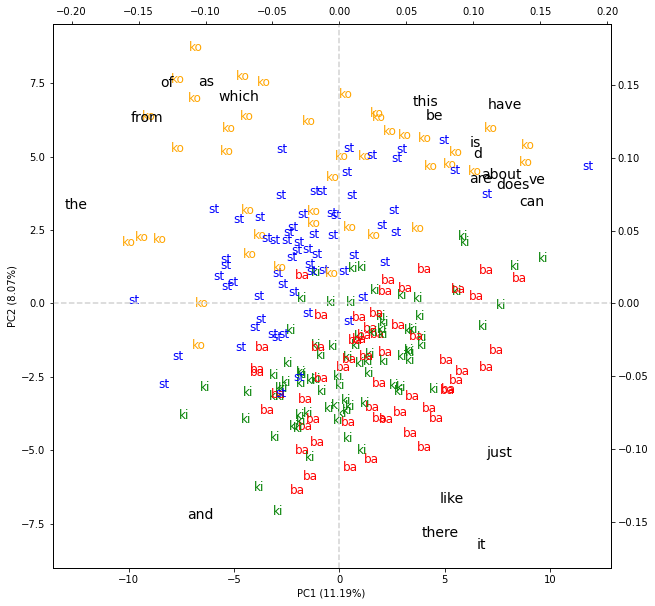

In [14]:
plot_pca(documents_proj, extreme_loadings, var_exp, segment_df.author)

In [15]:
extreme_loadings.sort_values(by='multiplied_abs').to_csv("extreme_loadings.csv")